In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT/Resume_project_data/gold_price/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
df.shape

(2290, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

  1.Positive Correlation
  
  2.Negative Correlation

In [10]:
correlation = df.corr()

<ipython-input-10-bbce1ddb6927>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

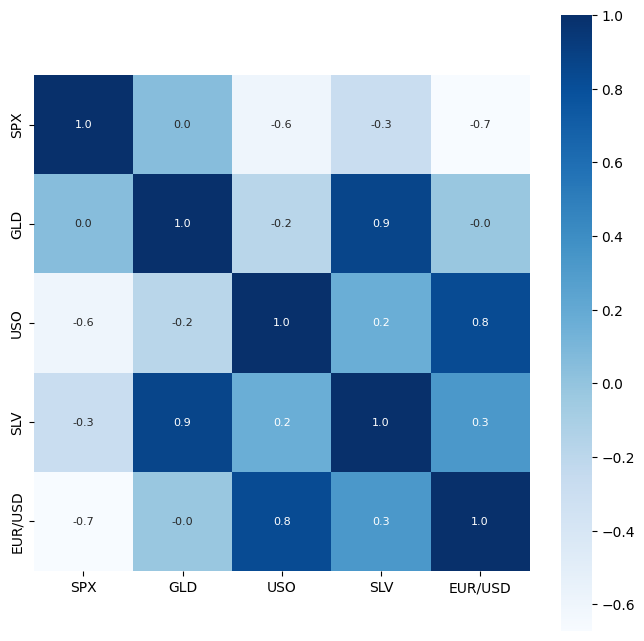

In [13]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot=True, annot_kws = {'size': 8}, cmap = 'Blues')

In [14]:
# correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-16-005be54d73e9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

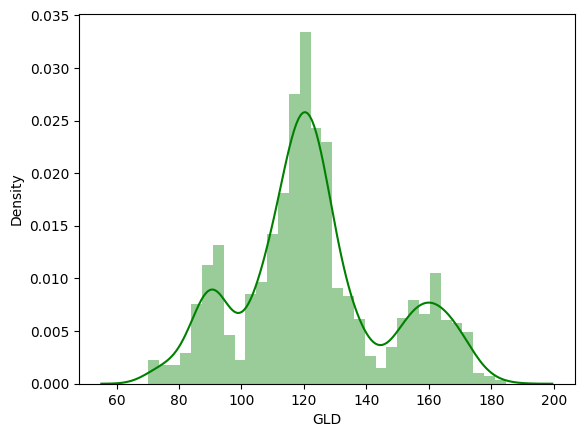

In [16]:
# checking the distribution of the GOLD price
sns.distplot(df['GLD'], color = 'green')

**Spliting the Features and Target**

In [18]:
x = df.drop(['Date', 'GLD'],axis = 1)
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [20]:
y = df['GLD']
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

**Spliting into Training and Testiing**

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

In [25]:
x_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [26]:
x_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492
1693,1952.290039,14.930000,13.990000,1.129089
2054,2349.010010,11.060000,17.430000,1.064453
658,1273.849976,37.680000,28.420000,1.315686


In [27]:
y_train

476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1832, dtype: float64

In [28]:
y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

**Model training**

In [29]:
reg_model = RandomForestRegressor(n_estimators = 100)

In [30]:
reg_model.fit(x_train, y_train)

RandomForestRegressor()

**Model evaluation**

In [35]:
test_data_trediction = reg_model.predict(x_test)

In [36]:
print(test_data_trediction)

[168.39239946  81.99329977 116.04440024 127.80260036 120.57760139
 154.52229779 150.46129775 126.16970036 117.35479875 125.90600103
 116.55850108 172.2002008  141.06559855 167.79659804 115.21230022
 117.48340041 138.67450358 170.16640115 159.2162028  158.80389959
 155.22110042 125.15910022 176.01629954 156.99740359 125.14080037
  93.94509967  77.11870034 120.88620011 119.20199977 167.50860016
  88.04960027 125.1440003   91.0325004  117.61180018 121.2661995
 136.07190068 115.34980122 115.27280056 148.64729964 107.29850112
 104.49130243  87.15449797 126.46410044 117.87219992 152.66129869
 119.60659992 108.3742997  108.14849807  93.14620071 127.20469777
  74.8362003  113.57459904 121.24420023 111.23829902 118.98969905
 120.65809962 158.79560005 168.60490129 146.83079648  86.05039874
  94.15730052  86.93869864  90.62660046 118.9543011  126.41590027
 127.5239003  169.71229976 122.31809919 117.21779884  98.92710044
 167.63530049 143.17539878 132.00260244 121.24210243 121.38679932
 119.730900

In [40]:
# R square error
error_score = metrics.r2_score(y_test, test_data_trediction)
print('R squared error :', error_score)

R squared error : 0.9883916838567757


**Compare the actual values and predicted values in Plot**

In [41]:
y_test = list(y_test)

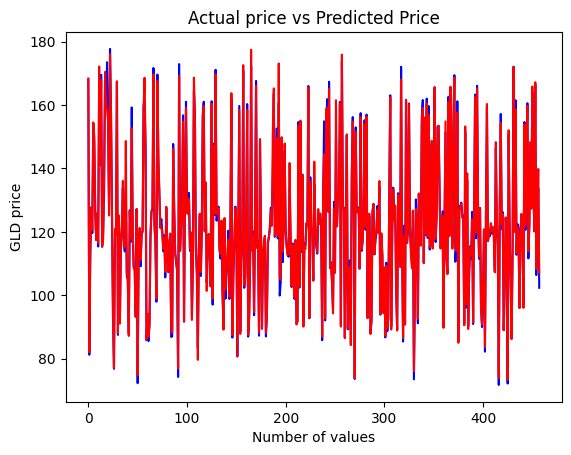

In [45]:
plt.plot(y_test, color = 'blue', label = 'Actual value')
plt.plot(test_data_trediction, color = 'red', label = 'Predicted value')
plt.title('Actual price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.show()